# Purpose:
- To view raw fluorescence traces from lims results

In [18]:
from pathlib import Path
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Add the plane path manually here
plane_path = Path(r'\\allen\programs\mindscope\production\learning\prod1\specimen_1341432280\ophys_session_1372019046\ophys_experiment_1372153912'.replace('\\', '/'))

# raw traces are in the "processed" folder - roi_traces.h5 file.
# dff traces are in the plane folder - ###_dff.h5 file.


In [16]:
plane_id = plane_path.name.split('_')[-1]
with h5py.File(plane_path / f'{plane_id}_dff.h5', 'r') as f:
    dff = f['data'][:]
    roi_names = f['roi_names'][:]
    print(f.keys())
with h5py.File(plane_path / 'processed' / 'roi_traces.h5', 'r') as f:    
    raw = f['data'][:]
    raw_roi_names = f['roi_names'][:]
# check if roi names are the same
assert np.all(roi_names == raw_roi_names)

<KeysViewHDF5 ['data', 'num_small_baseline_frames', 'roi_names', 'sigma_dff']>


Text(0.5, 0, 'Frame #')

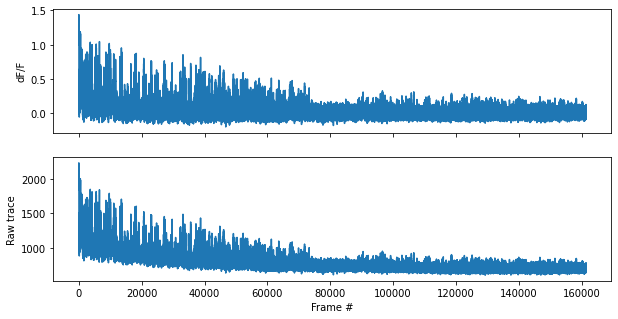

In [34]:
# # select a random roi
# roi_idx = np.random.randint(0, len(roi_names))
# or select a specific roi
roi_idx = 5

roi_name = roi_names[roi_idx]
fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
ax[0].plot(dff[roi_idx])
ax[1].plot(raw[roi_idx])
ax[0].set_ylabel('dF/F')
ax[1].set_ylabel('Raw trace')
ax[1].set_xlabel('Frame #')


In [35]:
import napari

In [45]:
# visualize some raw frames
with h5py.File(plane_path / f'{plane_id}.h5', 'r') as f:
    data_len = f['data'].shape[0]

frames = np.linspace(0, data_len-1, 100).astype(int)

with h5py.File(plane_path / f'{plane_id}.h5', 'r') as f:
    raw_frames = []
    for frame in frames:
        raw_frames.append(f['data'][frame])
    print(f.keys())

<KeysViewHDF5 ['data', 'scanimage_metadata']>


In [47]:
viewer = napari.Viewer()
viewer.add_image(np.asarray(raw_frames), name='raw')

<Image layer 'raw' at 0x1e840c15910>